In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import classification_report
from sklearn import preprocessing

In [78]:
comp = pd.read_csv('Company_Data.csv')

In [25]:
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [26]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [27]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


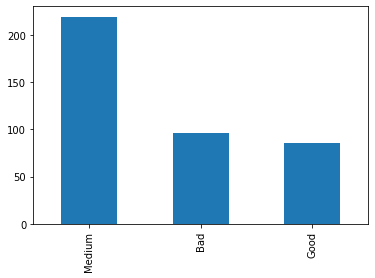

In [28]:
pd.value_counts(comp['ShelveLoc']).plot.bar()

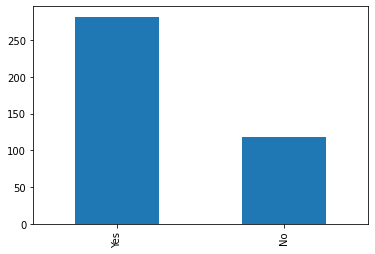

In [29]:
pd.value_counts(comp['Urban']).plot.bar()

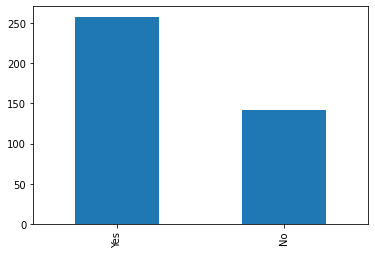

In [30]:
pd.value_counts(comp['US']).plot.bar()

In [81]:
df = pd.get_dummies(comp, columns=['ShelveLoc','Urban','US'])

In [82]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [31]:
df.shape

(396, 17)

In [32]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
count,396.000000,396.000000,396.00000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.00000,396.00000,396.000000,396.0
mean,7.475960,125.025253,68.64899,6.643939,263.489899,115.936869,53.277778,13.909091,0.237374,0.209596,0.553030,0.287879,0.712121,0.35101,0.64899,0.091572,1.0
std,2.812506,15.242657,27.85824,6.607781,146.934214,23.664074,16.198566,2.619657,0.426011,0.407535,0.497809,0.453347,0.453347,0.47789,0.47789,0.038090,0.0
min,0.000000,77.000000,21.00000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000032,1.0
25%,5.360000,115.000000,43.75000,0.000000,138.500000,100.750000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.067019,1.0
50%,7.470000,125.000000,69.00000,5.000000,271.000000,117.500000,54.500000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.00000,0.093221,1.0
75%,9.320000,135.000000,90.25000,12.000000,394.500000,131.000000,66.000000,16.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.00000,0.119305,1.0
max,16.270000,175.000000,120.00000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,0.176954,1.0


In [79]:
from sklearn.ensemble import IsolationForest

In [83]:
# training the model for outlier detection
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=10, verbose=0, warm_start=False)

In [84]:
# predictions
y_pred_outliers = clf.predict(df)

In [85]:
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [86]:
df['scores']=clf.decision_function(df)

In [87]:
df['anomaly']=clf.predict(df.iloc[:,0:15])

In [88]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0.115957,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0.079011,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0.137354,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.146696,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.086010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0.073416,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0.076692,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0.088195,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0.121714,1


In [89]:
#Print the outlier data points
df[df['anomaly']==-1]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
25,14.90,139,32,0,176,82,54,11,0,1,0,1,0,1,0,-0.012176,-1
75,8.55,88,111,23,480,92,36,16,1,0,0,1,0,0,1,-0.024554,-1
207,8.19,111,105,0,466,97,61,10,1,0,0,1,0,1,0,-0.003174,-1
317,6.41,142,30,0,472,136,80,15,0,1,0,1,0,1,0,-0.004110,-1


In [90]:
#Dropping the outliers
df.drop(index = [25,75,207,317], inplace = True)

In [54]:
df.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0.115957,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0.079011,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0.137354,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.146696,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.086010,1
5,10.81,124,113,13,501,72,78,16,1,0,0,1,0,0,1,0.003040,1
6,6.63,115,105,0,45,108,71,15,0,0,1,0,1,1,0,0.114549,1
7,11.85,136,81,15,425,120,67,10,0,1,0,0,1,0,1,0.105360,1
8,6.54,132,110,0,108,124,76,10,0,0,1,1,0,1,0,0.056743,1
9,4.69,132,113,0,131,124,76,17,0,0,1,1,0,0,1,0.045660,1


In [91]:
df.reset_index(drop=True, inplace=True)

In [95]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0.115957,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0.079011,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0.137354,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.146696,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.086010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0.073416,1
392,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0.076692,1
393,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0.088195,1
394,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0.121714,1


In [93]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,scores,anomaly
count,396.000000,396.000000,396.00000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.00000,396.00000,396.000000,396.0
mean,7.475960,125.025253,68.64899,6.643939,263.489899,115.936869,53.277778,13.909091,0.237374,0.209596,0.553030,0.287879,0.712121,0.35101,0.64899,0.091572,1.0
std,2.812506,15.242657,27.85824,6.607781,146.934214,23.664074,16.198566,2.619657,0.426011,0.407535,0.497809,0.453347,0.453347,0.47789,0.47789,0.038090,0.0
min,0.000000,77.000000,21.00000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000032,1.0
25%,5.360000,115.000000,43.75000,0.000000,138.500000,100.750000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.067019,1.0
50%,7.470000,125.000000,69.00000,5.000000,271.000000,117.500000,54.500000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.00000,0.093221,1.0
75%,9.320000,135.000000,90.25000,12.000000,394.500000,131.000000,66.000000,16.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.00000,0.119305,1.0
max,16.270000,175.000000,120.00000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,0.176954,1.0


In [96]:
data_com = df.iloc[:,0:15]

In [97]:
data_com

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
392,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
393,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
394,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [ ]:
#@title
column_names=df.columns

In [ ]:
#@title
#using minmax scaler to normalize data as there are outiers present
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#@title
scaler = MinMaxScaler()
rescaledx=scaler.fit_transform(df)


In [ ]:
#@title
rescaledx

In [ ]:
#@title
c_data = pd.DataFrame(rescaledx, columns=column_names)#convert to dataframe with original column names retained

In [ ]:
#@title
c_data   #normalized data

In [ ]:
#@title
c_data.describe()

In [ ]:
#@title
c_data.info()

In [ ]:
#@title
array=c_data.values


In [98]:
array=data_com.values
X=array[:,1:]#dividing dependent and independent varialb for train and test split func
y=array[:,0]

In [99]:
X

array([[138.,  73.,  11., ...,   1.,   0.,   1.],
       [111.,  48.,  16., ...,   1.,   0.,   1.],
       [113.,  35.,  10., ...,   1.,   0.,   1.],
       ...,
       [162.,  26.,  12., ...,   1.,   0.,   1.],
       [100.,  79.,   7., ...,   1.,   0.,   1.],
       [134.,  37.,   0., ...,   1.,   0.,   1.]])

In [100]:
y

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14,  8.33,  5.27,
        2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,  8.89,
        4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,  4.56,
       12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,  4.9 ,
        6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,  8.47,
        7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,  5.52,
       12.61,  6.2 , 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,
        4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,
        4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,  4.88,  4.11,
        6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,  3.47,  8.98,
        9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,  8.8 ,  7.57,
        7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34, 11.27,  6.52,
        4.96,  4.47,

In [101]:
#splitting the data into training and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=1)

In [ ]:
#here the dependent variable is sale column which is a continuous numeric data so we need to use CART method.

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [104]:
#Find the accuracy
model.score(X_test,y_test)

0.42143160969196325

In [ ]:
#Now we convert sales variable to categorical variable and build decision tree

In [107]:
comp = pd.read_csv('Company_Data.csv')

In [108]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [109]:
from sklearn.preprocessing import LabelEncoder
encoder1=LabelEncoder()
comp['ShelveLoc'] =encoder1.fit_transform(comp['ShelveLoc'])
comp['Urban'] =encoder1.fit_transform(comp['Urban'])
comp['US'] =encoder1.fit_transform(comp['US'])

In [110]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [111]:
#convert target variable into categorical variable
comp['Sales'].values

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,

In [112]:
comp['Sales']=pd.cut(np.array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
        5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
        7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,  7.95,
        5.33,  4.81,  4.53,  8.86,  8.39,  5.58,  9.48,  7.45, 12.49,
        4.88,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,  5.55,  0.16,  8.55,
        3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,  8.54,  5.08,
        8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,  9.34,
       11.27,  6.52,  4.96,  4.47,  8.41,  6.5 ,  9.54,  7.62,  3.67,
        6.44,  5.17,  6.52, 10.27, 12.3 ,  6.03,  6.53,  7.44,  0.53,
        9.09,  8.77,  3.9 , 10.51,  7.56, 11.48, 10.49, 10.77,  7.64,
        5.93,  6.89,  7.71,  7.49, 10.21, 12.53,  9.32,  4.67,  2.93,
        3.63,  5.68,  8.22,  0.37,  6.71,  6.71,  7.3 , 11.48,  8.01,
       12.49,  9.03,  6.38,  0.  ,  7.54,  5.61, 10.48, 10.66,  7.78,
        4.94,  7.43,  4.74,  5.32,  9.95, 10.07,  8.68,  6.03,  8.07,
       12.11,  8.79,  6.67,  7.56, 13.28,  7.23,  4.19,  4.1 ,  2.52,
        3.62,  6.42,  5.56,  5.94,  4.1 ,  2.05,  8.74,  5.68,  4.97,
        8.19,  7.78,  3.02,  4.36,  9.39, 12.04,  8.23,  4.83,  2.34,
        5.73,  4.34,  9.7 , 10.62, 10.59,  6.43,  7.49,  3.45,  4.1 ,
        6.68,  7.8 ,  8.69,  5.4 , 11.19,  5.16,  8.09, 13.14,  8.65,
        9.43,  5.53,  9.32,  9.62,  7.36,  3.89, 10.31, 12.01,  4.68,
        7.82,  8.78, 10.  ,  6.9 ,  5.04,  5.36,  5.05,  9.16,  3.72,
        8.31,  5.64,  9.58,  7.71,  4.2 ,  8.67,  3.47,  5.12,  7.67,
        5.71,  6.37,  7.77,  6.95,  5.31,  9.1 ,  5.83,  6.53,  5.01,
       11.99,  4.55, 12.98, 10.04,  7.22,  6.67,  6.93,  7.8 ,  7.22,
        3.42,  2.86, 11.19,  7.74,  5.36,  6.97,  7.6 ,  7.53,  6.88,
        6.98,  8.75,  9.49,  6.64, 11.82, 11.28, 12.66,  4.21,  8.21,
        3.07, 10.98,  9.4 ,  8.57,  7.41,  5.28, 10.01, 11.93,  8.03,
        4.78,  5.9 ,  9.24, 11.18,  9.53,  6.15,  6.8 ,  9.33,  7.72,
        6.39, 15.63,  6.41, 10.08,  6.97,  5.86,  7.52,  9.16, 10.36,
        2.66, 11.7 ,  4.69,  6.23,  3.15, 11.27,  4.99, 10.1 ,  5.74,
        5.87,  7.63,  6.18,  5.17,  8.61,  5.97, 11.54,  7.5 ,  7.38,
        7.81,  5.99,  8.43,  4.81,  8.97,  6.88, 12.57,  9.32,  8.64,
       10.44, 13.44,  9.45,  5.3 ,  7.02,  3.58, 13.36,  4.17,  3.13,
        8.77,  8.68,  5.25, 10.26, 10.5 ,  6.53,  5.98, 14.37, 10.71,
       10.26,  7.68,  9.08,  7.8 ,  5.58,  9.44,  7.9 , 16.27,  6.81,
        6.11,  5.81,  9.64,  3.9 ,  4.95,  9.35, 12.85,  5.87,  5.32,
        8.67,  8.14,  8.44,  5.47,  6.1 ,  4.53,  5.57,  5.35, 12.57,
        6.14,  7.41,  5.94,  9.71]),3,labels=["Low", "Medium", "High"])


In [113]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,Medium,113,35,10,269,80,2,59,12,1,1
3,Medium,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,1,33,14,1,1
396,Medium,139,23,3,37,120,2,55,11,0,1
397,Medium,162,26,12,368,159,2,40,18,1,1
398,Medium,100,79,7,284,95,0,50,12,1,1


In [117]:
comp.Sales.unique()

['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [118]:
x=comp.iloc[:,1:]
y=comp['Sales']

In [119]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [120]:
y

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [121]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.33,random_state=10)

In [129]:
model1 =DecisionTreeClassifier(criterion='entropy',max_depth=3)
model1.fit(x_train,y_train)
y_pred =model1.predict(x_test)

[Text(465.0, 792.75, 'ShelveLoc <= 0.5\nentropy = 1.326\nsamples = 268\nvalue = [33, 74, 161]\nclass = Low'),
 Text(232.5, 566.25, 'Price <= 93.0\nentropy = 1.029\nsamples = 65\nvalue = [1, 42, 22]\nclass = High'),
 Text(116.25, 339.75, 'Population <= 69.5\nentropy = 0.817\nsamples = 12\nvalue = [1, 1, 10]\nclass = Low'),
 Text(58.125, 113.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Medium'),
 Text(174.375, 113.25, 'entropy = 0.439\nsamples = 11\nvalue = [0, 1, 10]\nclass = Low'),
 Text(348.75, 339.75, 'Price <= 136.5\nentropy = 0.772\nsamples = 53\nvalue = [0, 41, 12]\nclass = High'),
 Text(290.625, 113.25, 'entropy = 0.881\nsamples = 40\nvalue = [0, 28, 12]\nclass = High'),
 Text(406.875, 113.25, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0]\nclass = High'),
 Text(697.5, 566.25, 'ShelveLoc <= 1.5\nentropy = 1.214\nsamples = 203\nvalue = [32, 32, 139]\nclass = Low'),
 Text(581.25, 339.75, 'Price <= 121.5\nentropy = 1.178\nsamples = 57\nvalue = [25, 2, 30]\nclass = L

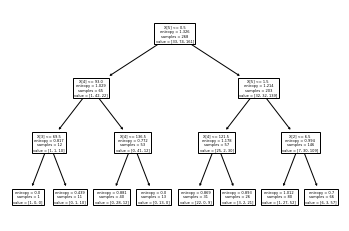

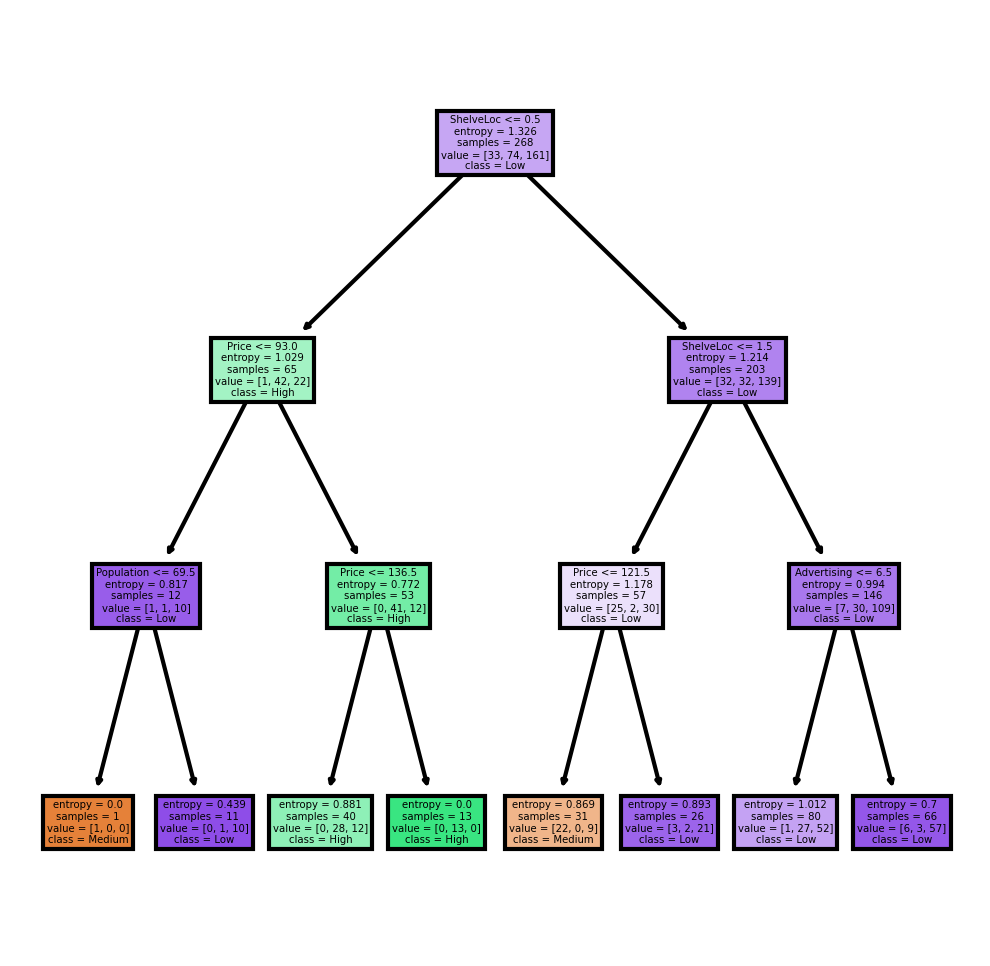

In [130]:
tree.plot_tree(model1)
fn =['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Medium', 'High', 'Low']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model1,feature_names=fn,
               class_names=cn,
               filled= True)

In [126]:
y_pred

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low',
       'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
     

In [134]:
from sklearn.metrics import accuracy_score

accuracy =accuracy_score(y_test,y_pred)
accuracy

0.6136363636363636

In [135]:

count_misclassified =(y_test != y_pred).sum()
count_misclassified

51

In [136]:
pd.crosstab(y_test,y_pred)

col_0,High,Low,Medium
Sales,,,
Low,0,11,17
Medium,7,13,66
High,4,0,14
